# 图割

图割方法的原理：首先将图像中的各个像素表示为图的各个节点，然后求图到节点组的最优分割。最优的判断是，某个组中的成员的值较高，而不同组的成员的值较低。图割分割的结果要优于本章的其他分割方法的结果。这种优点的代价是增大了实现的复杂性，进而降低了执行的速度

## 作为图的图像
图G是由节点集合V和连接这些顶点的边的集合E组成的数学结构：
$$
    G = (V , E)
$$
式中，V是一个集合：
$$
    E \subseteq V \times V
$$
是V中有序元素对的集合。诺$(u,v) \in E $,反之亦然，则被称为无相图；否则图被称为有向图。

我门感兴趣的图是无向图，五向图的边由矩阵W进一步表征，无向图的元素$w(i,j)$是与连接节点i和j的边相关联的权重。因为图是无向的，所以有$w(i,j) = w(j,i)$,这表明W是对称矩阵。所选权重与所有节点对之间的一个或多个相似性测度成正比。边与权相关联的图称为加权图。

本次介绍的内容是将待分割图像表示为一个加权的无向图，其中图的节点是图像中的像素，边在每对节点之间形成。每条边的权重$w(i,j)$是节点i和j之间相似性的函数。然后试图将图的节点划分为不相交的子集$V_1,V_2,V_3,....,V_k$,按照某个测度，一个子集内的节点之间的相似性高，而不同子集节点之间的相似性低。分割后的子集的节点，对应与分割后的图像中的区域。

通过切割图将集合V划分为多个子集。图的一次切割将V分为两个子集A和B ， 满足：
$$
    A \bigcup B = V 和 A \bigcap B = \varnothing
$$
其中切割是通过删除连接子图A和B的边来实现的。使用图割来分割图像时，有两个关键的问题：

1） 如何关联图与图像

2） 如何以将图像分割成背景和前景像素的方式来切割图。

图像生成图的一种简化方法。图中的节点对应与图像中的像素，为便于说明，我们只允许相邻像素之间的边使用4连通，这意味着不存在连接这些像素的对角边。但要记住的是，一般来说，边在每对像素之间规定。边的权重通常由空间关系(如顶点像素距离)和灰度测度(如纹理和颜色)形成，这与展示像素间的相似性一致。在这个简单的例子中，我们将两个像素间的相似性定义为他们的灰度差的倒数。也就是说，对与两个节点(像素)$n_i$和$n_j$,他们之间的边的权重是$w(i,j) = 1 / (|I(n_i) - I(n_j)| + c)$，其中$I(n_i)$和$I(n_j)$是两个节点(像素)的灰度，c是防止被零除而包含的一个常数。因此，相邻像素之间的灰度值越接近，w的值越大

## 最小图割

将图像表示为图后，下一步是将图切割为两个或多个子图。每个子图的节点（像素）都对应于分割后的图像的一个区域。，依赖于将图解释为流网络并得到通常称为最小图割内容。这一表诉依据的是所谓的最大流，最小割定理。这个定理指出，在流网络中，从源终端节点传递到汇聚终端节点的最大流量等于最小割。最小割定义为边的最小权重，诺删除他，则会断开汇聚终端节点与源终端节点
$$
    cut(A,B) = \sum_{u \in A , v \in B}w(u,v)
$$

图的最优划分是将使得这个切割值最小的划分。这样的划分有一个指数，因此计算起来较为困难。然而，为求解最大流问题，人们开发了许多以多项式时间运行的高效算法。因此，根据最大流，最小割定理，我们可以对图像分割应用这些算法，条件是我们将分割作为一个流问题处理，并为边和t链选择使图割最小的权重，进而得到有意义的分割。

## 计算最小图割
令V表示图G的节点，令A和B是满足式的V的两个子集。令K表示V中的节点数，并定义一个K维指示向量x：诺V的节点$n_i$在A中，则这个向量的元素$x_i = 1$;诺V的节点$n_i$在B中，则$x_i = - 1$。令
$$
    d_i = \sum w(i,j)
$$
是V中从节点$n_i$到所有其他节点的权重之和。使用这些定义，可将式写为:
$$
    Ncut(A,B) = \frac{cut(A,B)}{cut(A,V)} + \frac{cut(A,B)}{cut(B,V)}
              = \frac{\sum_{x_i>0 , x_j<0} -w(i,j)x_ix_j}{\sum_{x_i>0}d_i} + \frac{\sum_{x_i<0,x_j>0}-w(i,j)x_ix_j}{\sum_{x_i<0}d_i}
$$
目的是找到一个向量x，以最小化$Ncut(A,B)$。是的最小的解析解可以求出，但只有当x的元素是实联系数而不限制为$\pm 1$时才可行。 Shi And Malik给出的解是通过求解广义本征系统表达式得到的：
$$
    （D-W）y = \lambda Dy
$$
式中，D是一个大小为$K \times K$的对角矩阵，对角元素为$d_i$,$i = 1,2,3....,K$;W是一个大小为$K \times K$的权重矩阵，其元素$w(i,j)$的定义见前面的说明。解方程得到K个本征值和K个本征向量，每个本征向量对应一个本征值。我们的问题的解是对应于第二小本征值的一个本征向量。

我们可以将前面的广义本征值公式转换为一个标准的本征值问题。
$$
    Az = \lambda z 
$$
式中， $A = D^{-1/2}(D-W)D^{-1/2}$

和 $z = D^{1/2}y$

由此得出 $y = D^{1/2}z$

因此使用一个广义的或标准的本征值求解程序，就可以求出与第二最小本征值对应本征向量。通过找到一个将连续本征向量元素的值分为两部分的分离点，就可以得到的连续值解向量生成所需的向量x。我们是通过找到产生最小Ncut值的分离点来实现这一目的，因为这是我们正试图最小化的量。

## 图割分割算法
1. 给定一组特征，规定一个加权图$G = (V,E)$其中V包含特征空间的点，E包含图的边。计算边的权值，并用他们构建矩阵W和D。令K表示图中所需的分区数量。
2. 解本征值系统$ (D-W)y= \lambda Dy $,求出具有第二最小本征值的特征向量
3. 使用步骤2的本征向量，通过求使得$Ncut(A,B)$最小的分离点，对图进行二分。
4. 如果切割数未达到K，那么通过检查切割的稳定性来确定是否应细分当前的分区。
5. 必要时，递归地重新划分已分割的部分。

In [239]:
import numpy as np 
import matplotlib.pyplot as plt 



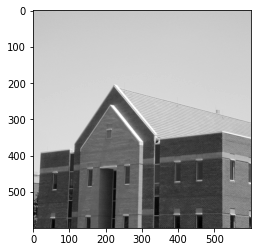

In [240]:
f = plt.imread("./../images/building-600by600.tif")
plt.imshow(f , "gray")

In [241]:
# 人为制造前景，背景的集合
A = list()
B = list()
for x in range(f.shape[1]):
    A.append([500,x])
    B.append([200,x])
A = np.array(A)
B = np.array(B)

In [242]:
import math
def compute_weight(pixel_1,pixel_2,r,sigma_i= 1,sigma_d =1):
    y,x,l = pixel_1
    _y,_x,_l = pixel_2
    dist = (y-_y) ** 2 + (x-_x) ** 2
    weight = 0 
    if dist <= r ** 2 :        
        powi = (- math.pow(l - _l,2)) / math.pow(sigma_i,2)         
        weight = np.exp(powi) * np.exp(dist / math.pow(sigma_d,2))
    return weight

In [243]:
# V 是节点的集合，在这个算法中是超像素(y,x,l)的集合
V = []  
h,w  = f.shape
for y in range(h):
    for x in range(w):
        l = f[y][x]
        V.append([y,x,l])
V = np.array(V)
V.shape



(360000, 3)

In [244]:
# W矩阵，计算每个节点之间的权重
r = 1 
v_len = V.shape[0]
W = [0 for _ in range(v_len)]
for i in range(v_len):   
    W[i] = [0,0,0,0]
    row = i / w
    column = i % w 
    # 4领域，顺时针
    neribor = [-w, 1 , w , - 1]
    if row == 0:
        neribor[0] = None
    if row == h - 1 :
        neribor[2] = None 
    if column == 0 :
        neribor[3] = None 
    if column == w - 1 :
        neribor[1] = None
    index = 0 
    for offset in neribor:        
        if offset is None:
            index = index + 1
            continue 
        if i + offset >= v_len:
            continue
        nsp = V[i + offset]
        weight = compute_weight(V[i] , V[i + offset] ,r  =1 )
        W[i][index] = weight  
        index = index + 1      
W

5],
 [1.0, 1.0, 3.775134544279098e-11, 0.00033546262790251185],
 [0.04978706836786394, 0.04978706836786394, 1.0, 1.0],
 [2.718281828459045,
  0.04978706836786394,
  0.04978706836786394,
  0.04978706836786394],
 [0.00033546262790251185,
  0.04978706836786394,
  3.059023205018258e-07,
  0.04978706836786394],
 [0.04978706836786394,
  0.04978706836786394,
  3.059023205018258e-07,
  0.04978706836786394],
 [2.718281828459045, 1.0, 0.04978706836786394, 0.04978706836786394],
 [2.718281828459045, 0.04978706836786394, 0.04978706836786394, 1.0],
 [0.00033546262790251185,
  2.718281828459045,
  0.04978706836786394,
  0.04978706836786394],
 [0.00033546262790251185,
  0.04978706836786394,
  0.00033546262790251185,
  2.718281828459045],
 [3.059023205018258e-07,
  0.04978706836786394,
  0.00033546262790251185,
  0.04978706836786394],
 [2.718281828459045, 1.0, 1.0, 0.04978706836786394],
 [2.718281828459045, 2.718281828459045, 0.04978706836786394, 1.0],
 [0.04978706836786394, 1.0, 2.718281828459045, 2.7